In [1]:
#CNN model without diffusion
import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from keras import backend as K
from tensorflow.keras.models import Model
from keras.layers import (
    Input,
    Activation,
    Conv3D,
    Conv3DTranspose,
    MaxPooling3D,
    UpSampling3D,
    concatenate,
    ReLU, Dropout,BatchNormalization
    
)

from keras.optimizers import Adam
from keras.utils import to_categorical
from tensorflow.compat.v1.logging import INFO, set_verbosity

set_verbosity(INFO)

import tensorflow.python.keras.backend as K
K.set_image_data_format("channels_first")

In [2]:
#Definning random seed
np.random.seed(1000)

In [3]:
!pip install patchify

In [4]:
import numpy as np
import os
from keras.utils import to_categorical
import matplotlib.pyplot as plt

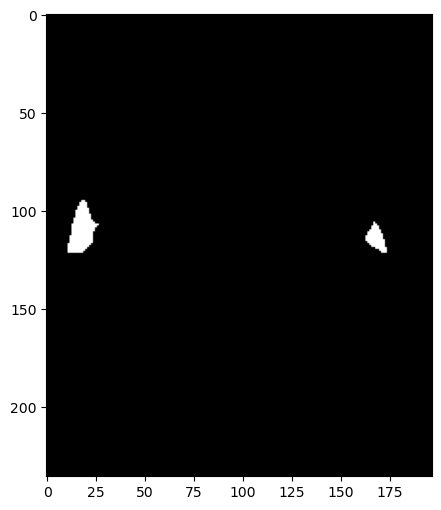

In [5]:
HOME_DIR = "../input/pddca-dataset/pddca/"
DATA_DIR = HOME_DIR

def load_case(imgfile, labelfile):
    # load the image and label file, get the image content and return a numpy array for each
    image = np.array(np.load(imgfile))
    label = np.array(np.load(labelfile))
    
    return image, label

img=[]
msk=[]
for dir in os.listdir(DATA_DIR):
    #print(dir)
    imfile=DATA_DIR+"/"+str(dir)+"/img_crp_v2.npy"
    lbfile=DATA_DIR+"/"+str(dir)+"/structures/mask.npy"
    #print(os.path.isfile(lbfile),lbfile)
    if(os.path.isfile(lbfile)):
        im,ms=load_case(imfile,lbfile)
        #print(im,ms)
        img.append(im)
        msk.append(ms)

plt.figure(figsize=(14,6))
im1=msk[1]
plt.imshow(im1[36,:,:],cmap='gray')

In [6]:
!pip install elasticdeform

  Preparing metadata (setup.py) ... - \ done
  Created wheel for elasticdeform: filename=elasticdeform-0.5.0-cp37-cp37m-linux_x86_64.whl size=94831 sha256=ab3a9833374b0bf4215720be5784a1805a8e2aa002c472657c2b063337405393
  Stored in directory: /root/.cache/pip/wheels/c7/a0/d7/8faec37611d8423a9e4b307978a42f9bee700f7d5044a082c8
Successfully built elasticdeform


In [7]:
# from scipy import ndimage
# from scipy.ndimage import affine_transform
# import elasticdeform
# import multiprocessing as mp


# # theta = np.random.uniform(0,0)
# # img_data = tf.keras.preprocessing.image.apply_affine_transform(tri, theta=theta, channel_axis=3)

# # print(tri.shape)
# # Flip the image along the z-axis
# # flipped_data = np.flip(tri, axis=2)

# # Rotate the array by 90 degrees along the x-axis
# # arr_rotated = np.rot90(tri, k=1, axes=(2, 3))

# def flip3D(X, y):
#     choice = np.random.randint(3)
#     if choice == 0:
#         X_flip, y_flip = X[::-1, :, :], y[::-1, :, :]
#     if choice == 1: # flip on y
#         X_flip, y_flip = X[:, ::-1, :], y[:, ::-1, :]
#     if choice == 2: # flip on z
#         X_flip, y_flip = X[:, :, ::-1], y[:, :, ::-1]
        
#     return X_flip, y_flip



# def rotation(X,y):
#     Xn=np.rot90(X, k=1, axes=(1, 2))
#     yn=np.rot90(y, k=1, axes=(1, 2))
    
#     return Xn,yn

# def brightness(X, y):
#     """
#     Changing the brighness of a image using power-law gamma transformation.
#     Gain and gamma are chosen randomly for each image channel.
    
#     Gain chosen between [0.8 - 1.2]
#     Gamma chosen between [0.8 - 1.2]
    
#     new_im = gain * im^gamma
#     """
    
#     X_new = np.zeros(X.shape)
#     for c in range(X.shape[-1]):
#         im = X[:,:,:,c]        
#         gain, gamma = (1.2 - 0.8) * np.random.random_sample(2,) + 0.8
#         im_new = np.sign(im)*gain*(np.abs(im)**gamma)
#         X_new[:,:,:,c] = im_new 
    
#     return X_new, y

# def elastic(X, y):
#     """
#     Elastic deformation on a image and its target
#     """
    
#     [Xel, yel] = elasticdeform.deform_random_grid([X, y], sigma=2, axis=[(0, 1, 2), (0, 1, 2)], order=[1, 0], mode='constant')
    
#     return Xel, yel

# def random_decisions(N):
#     """
#     Generate N random decisions for augmentation
#     N should be equal to the batch size
#     """
    
#     decisions = np.zeros((N, 3)) # 4 is number of aug techniques to combine (patch extraction excluded)
#     for n in range(N):
#         decisions[n] = np.random.randint(2, size=3)
        
#     return decisions

# def combine_aug(X, y, do):
#     """
#     Combine randomly the different augmentation techniques written above
#     """
#     Xnew, ynew = X, y
    
#     # make sure to use at least 25% of original images
#     if np.random.random_sample()>0.75:
#         return Xnew, ynew
#     else:  
#         if do[0] == 1:
#             Xnew, ynew = flip3D(Xnew, ynew)

# #         if do[1] == 1:
# #             Xnew, ynew = brightness(Xnew, ynew)   

#         if do[1] == 1:
#             Xnew, ynew = rotation(Xnew, ynew)

#         if do[2] == 1:
#             Xnew, ynew = elastic(Xnew, ynew)

#         return Xnew, ynew

# def aug_batch(Xb, Yb):
#     """
#     Generate a augmented image batch 
#     """
#     batch_size = 8
#     #newXb, newYb = np.empty_like(Xb, dtype=object), np.empty_like(Yb, dtype=object)
#     newXb, newYb = Xb, Yb
    
#     decisions = random_decisions(batch_size)            
        
#     inputs = [(X, y, do) for X, y, do in zip(Xb, Yb, decisions)]
#     pool = mp.Pool(processes=8)
#     multi_result = pool.starmap(combine_aug, inputs)
#     #print(multi_result[0][0].shape)
#     pool.close()
    
#     for i in range(batch_size):
#         newXb[i], newYb[i] = multi_result[i][0], multi_result[i][1]
        
#     return newXb, newYb 

# def data_aug(X, y):
#     X_f, y_f = flip3D(X,y)
#     X_r, y_r = rotation(X,y)
#     X_e, y_e = elastic(X,y)
#     #X_aug, y_aug = aug_batch(X, y)
#     X_aug = X_f + X_r + X_e
#     y_aug = y_f + y_r + y_e
#     return X_aug, y_aug


In [8]:
from scipy import ndimage
from scipy.ndimage import affine_transform
import elasticdeform
import multiprocessing as mp


# theta = np.random.uniform(0,0)
# img_data = tf.keras.preprocessing.image.apply_affine_transform(tri, theta=theta, channel_axis=3)

# print(tri.shape)
# Flip the image along the z-axis
# flipped_data = np.flip(tri, axis=2)

# Rotate the array by 90 degrees along the x-axis
# arr_rotated = np.rot90(tri, k=1, axes=(2, 3))

def flip3D(X, y):
    choice = np.random.randint(3)
    if choice == 0:
        X_flip, y_flip = X[::-1, :, :], y[::-1, :, :]
    if choice == 1: # flip on y
        X_flip, y_flip = X[:, ::-1, :], y[:, ::-1, :]
    if choice == 2: # flip on z
        X_flip, y_flip = X[:, :, ::-1], y[:, :, ::-1]
        
    return X_flip, y_flip


def rotation_zoom3D(X, y):
    alpha, beta, gamma = np.random.random_sample(3)*np.pi/2
    Rx = np.array([[1, 0, 0],
                   [0, np.cos(alpha), -np.sin(alpha)],
                   [0, np.sin(alpha), np.cos(alpha)]])
   
    Ry = np.array([[np.cos(beta), 0, np.sin(beta)],
                   [0, 1, 0],
                   [-np.sin(beta), 0, np.cos(beta)]])
  
    Rz = np.array([[np.cos(gamma), -np.sin(gamma), 0],
                   [np.sin(gamma), np.cos(gamma), 0],
                   [0, 0, 1]])
    
    R_rot = np.dot(np.dot(Rx, Ry), Rz)
    
    a, b = 0.8, 1.2
    alpha, beta, gamma = (b-a)*np.random.random_sample(3) + a
    R_scale = np.array([[alpha, 0, 0],
                   [0, beta, 0],
                   [0, 0, gamma]])
    
    R = np.dot(R_rot, R_scale)
    X_rot = np.empty_like(X)
    for channel in range(X.shape[-1]):
        X_rot[:,:,:,channel] = affine_transform(X[:,:,:,channel], R, offset=0, order=1, mode='constant')
    y_rot = affine_transform(y, R, offset=0, order=0, mode='constant')
    
    return X_rot, y_rot

def rotation(X,y):
    Xn=np.rot90(X, k=1, axes=(1, 2))
    yn=np.rot90(y, k=1, axes=(1, 2))
    
    return Xn,yn

def brightness(X, y):
    """
    Changing the brighness of a image using power-law gamma transformation.
    Gain and gamma are chosen randomly for each image channel.
    
    Gain chosen between [0.8 - 1.2]
    Gamma chosen between [0.8 - 1.2]
    
    new_im = gain * im^gamma
    """
    
    X_new = np.zeros(X.shape)
    for c in range(X.shape[-1]):
        im = X[:,:,:,c]        
        gain, gamma = (1.2 - 0.8) * np.random.random_sample(2,) + 0.8
        im_new = np.sign(im)*gain*(np.abs(im)**gamma)
        X_new[:,:,:,c] = im_new 
    
    return X_new, y

def elastic(X, y):
    """
    Elastic deformation on a image and its target
    """
    
    [Xel, yel] = elasticdeform.deform_random_grid([X, y], sigma=2, axis=[(0, 1, 2), (0, 1, 2)], order=[1, 0], mode='constant')
    
    return Xel, yel

def random_decisions(N):
    """
    Generate N random decisions for augmentation
    N should be equal to the batch size
    """
    
    decisions = np.zeros((N, 3)) # 4 is number of aug techniques to combine (patch extraction excluded)
    for n in range(N):
        decisions[n] = np.random.randint(2, size=3)
        
    return decisions

def combine_aug(X, y, do):
    """
    Combine randomly the different augmentation techniques written above
    """
    Xnew, ynew = X, y
    
    # make sure to use at least 25% of original images
    if np.random.random_sample()>0.75:
        return Xnew, ynew
    else:  
        if do[0] == 1:
            Xnew, ynew = flip3D(Xnew, ynew)

#         if do[1] == 1:
#             Xnew, ynew = brightness(Xnew, ynew)   

        if do[1] == 1:
            Xnew, ynew = rotation(Xnew, ynew)

        if do[2] == 1:
            Xnew, ynew = elastic(Xnew, ynew)

        return Xnew, ynew

def aug_batch(Xb, Yb):
    """
    Generate a augmented image batch 
    """
    batch_size = 8
    #newXb, newYb = np.empty_like(Xb, dtype=object), np.empty_like(Yb, dtype=object)
    newXb, newYb = Xb, Yb
    
    decisions = random_decisions(batch_size)            
        
    inputs = [(X, y, do) for X, y, do in zip(Xb, Yb, decisions)]
    pool = mp.Pool(processes=8)
    multi_result = pool.starmap(combine_aug, inputs)
    #print(multi_result[0][0].shape)
    pool.close()
    
    for i in range(batch_size):
        newXb[i], newYb[i] = multi_result[i][0], multi_result[i][1]
        
    return newXb, newYb 

def data_aug(X, y):
    X_aug, y_aug = aug_batch(X, y)
    
    return X_aug, y_aug


In [9]:
imn,msn=data_aug(img,msk)
img=img+imn
msk=msk+msn

In [10]:
# print(len(img))
# print(len(imgn))

In [11]:
# imgn=img
# mskn=msk
# n=len(img)
# for i in range(n):
#     imf,msf=flip3D(img[i],msk[i])
#     #ime,mse=elastic(img[i],msk[i])
#     imr,msr=rotation(img[i],msk[i])
#     img.append(imf)
#     #img.append(ime)
#     img.append(imr)
    
#     msk.append(msf)
#     #msk.append(mse)
#     msk.append(msr)


In [12]:
# # print(len(img))
# print(len(img))
# print(len(msk))

In [13]:
# df=tf.data.Dataset.from_tensor_slices((imgn, mskn))
# def pipeline(tf_data):
#     tf_data = tf_data.shuffle(100)
#     tf_data = tf_data.batch(32)
#     tf_data = tf_data.prefetch(tf.data.experimental.AUTOTUNE)
    
#     return tf_data

# data = pipeline(df)
# print(data)

In [14]:
# imn,msn=data_aug(img,msk)

In [15]:
from patchify import patchify
import tensorflow as tf


img_patches = patchify(img[0], (32, 64, 64), step=64)
mask_patches  = patchify(msk[0], (32, 64, 64), step=64)
input_img = np.reshape(img_patches, (-1, img_patches.shape[3], img_patches.shape[4], img_patches.shape[5]))
input_mask = np.reshape(mask_patches, (-1, mask_patches.shape[3], mask_patches.shape[4], mask_patches.shape[5]))

train_img = np.stack((input_img,)*3, axis=-1)
train_mask = np.stack((input_mask,)*3, axis=-1)
# train_mask = to_categorical(input_mask, num_classes=3)

# train_img = np.expand_dims(train_img,axis=4)
# train_mask = np.expand_dims(train_mask, axis=4)


train_img=tf.cast(train_img, tf.float32)
train_mask=tf.cast(train_mask, tf.float32)



img_patches1 = patchify(img[1], (32, 64, 64), step=64)
mask_patches1  = patchify(msk[1], (32, 64, 64), step=64)
input_img1 = np.reshape(img_patches1, (-1, img_patches1.shape[3], img_patches1.shape[4], img_patches1.shape[5]))
input_mask1 = np.reshape(mask_patches1, (-1, mask_patches1.shape[3], mask_patches1.shape[4], mask_patches1.shape[5]))

train_img1 = np.stack((input_img1,)*3, axis=-1)
train_mask1 = np.stack((input_mask1,)*3, axis=-1)
#train_mask1 = to_categorical(input_mask1, num_classes=3)

# train_img1 = np.expand_dims(train_img1,axis=4)
# train_mask1 = np.expand_dims(train_mask1, axis=4)

train_img1=tf.cast(train_img1, tf.float32)
train_mask1=tf.cast(train_mask1, tf.float32)
#tf.cast(train_mask_cat1, tf.float32)


tri=np.concatenate((train_img,train_img1),axis=0)
trm=np.concatenate((train_mask,train_mask1),axis=0)
print(tri.shape)
print(trm.shape)

(15, 32, 64, 64, 3)
(15, 32, 64, 64, 3)


In [16]:
for i in range(2,len(img)):
    img_patches = patchify(img[i], (32, 64, 64), step=64)
    mask_patches  = patchify(msk[i], (32, 64, 64), step=64)
    input_img = np.reshape(img_patches, (-1, img_patches.shape[3], img_patches.shape[4], img_patches.shape[5]))
    input_mask = np.reshape(mask_patches, (-1, mask_patches.shape[3], mask_patches.shape[4], mask_patches.shape[5]))
 
    train_img = np.stack((input_img,)*3, axis=-1)
    train_mask = np.stack((input_mask,)*3, axis=-1)
    #train_mask = to_categorical(input_mask, num_classes=3)
    
#     train_img=np.expand_dims(train_img,axis=4)
#     train_mask = np.expand_dims(train_mask, axis=4)

  

    #train_mask_cat = to_categorical(input_mask, num_classes=3)
    train_img=tf.cast(train_img, tf.float32)
    train_mask=tf.cast(train_mask, tf.float32)

    tri=np.concatenate((tri,train_img),axis=0)
    trm=np.concatenate((trm,train_mask),axis=0)


print(tri.shape)
print(trm.shape)

(692, 32, 64, 64, 3)
(692, 32, 64, 64, 3)


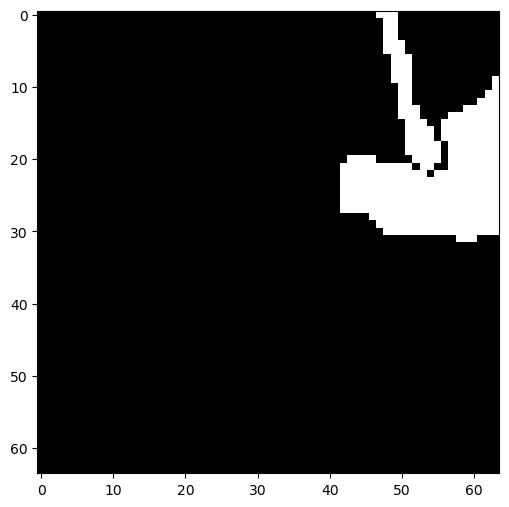

In [17]:
plt.figure(figsize=(8,6))
im1=trm[36]
plt.imshow(im1[25,:,:])

In [18]:
# del(img)
# del(msk)

In [19]:
# df=tf.data.Dataset.from_tensor_slices((tri, trm))


In [20]:
# import tensorflow as tf

# # Assume you have a tf.data.Dataset called 'dataset'
# output_file_pattern = '/kaggle/working/dataset.tfrecord'

# # Create a TFRecord writer
# writer = tf.data.experimental.TFRecordWriter(output_file_pattern)

# # Iterate through the dataset and write each element to the TFRecord file
# for element in df:
#     writer.write(element.numpy())

# # Close the writer
# writer.close()

In [21]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
#acc=keras.metrics.Accuracy


In [22]:
# Loss Function and coefficients to be used during training:
def dice_coefficient(y_true, y_pred):
    # tf.cast(y_true, tf.float32)
    # tf.cast(y_pred, tf.float32)
    smoothing_factor = 1
    flat_y_true = K.flatten(y_true)
    flat_y_pred = K.flatten(y_pred)
    return (2. * K.sum(flat_y_true * flat_y_pred) + smoothing_factor) / (K.sum(flat_y_true) + K.sum(flat_y_pred) + smoothing_factor)

def dice_coefficient_loss(y_true, y_pred):
    # print(y_true.shape)
    # print(y_pred.shape)
    return 1 - dice_coefficient(y_true, y_pred)

def iou_3d(y_true, y_pred):
    intersection = np.logical_and(y_true, y_pred)
    union = np.logical_or(y_true, y_pred)
    iou_score = np.sum(intersection) / np.sum(union)
    return iou_score

def iou_coef(y_true, y_pred):
    smooth=1
    intersection = K.sum(K.abs(y_true * y_pred), axis=[1,2,3])
    union = K.sum(y_true,[1,2,3])+K.sum(y_pred,[1,2,3])-intersection
    iou = K.mean((intersection + smooth) / (union + smooth), axis=0)
    return iou

# def dice_coeff(y_true, y_pred,smooth=1):
#     y_true_f = K.flatten(y_true)
#     y_pred_f = K.flatten(y_pred)
#     intersection = K.sum(y_true_f * y_pred_f)
#     score = (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)
#     return score


# # Computing Precision 
# def precision(y_true, y_pred):
#         true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
#         predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
#         precision = true_positives / (predicted_positives + K.epsilon())
#         return precision

    
# # Computing Sensitivity      
# def sensitivity(y_true, y_pred):
#     true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
#     possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
#     return true_positives / (possible_positives + K.epsilon())


# # Computing Specificity
# def specificity(y_true, y_pred):
#     true_negatives = K.sum(K.round(K.clip((1-y_true) * (1-y_pred), 0, 1)))
#     possible_negatives = K.sum(K.round(K.clip(1-y_true, 0, 1)))
#     return true_negatives / (possible_negatives + K.epsilon())

In [23]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import add

In [24]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv3D, MaxPooling3D, UpSampling3D, concatenate, BatchNormalization

def conv_block(input_tensor, num_filters):
    x = Conv3D(num_filters, kernel_size=(3, 3, 3), activation='relu', padding='same')(input_tensor)
    x = BatchNormalization()(x)
    x = Conv3D(num_filters, kernel_size=(3, 3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    return x

def res_block(input_tensor, num_filters):
    x = conv_block(input_tensor, num_filters)
    x = concatenate([x, input_tensor])
    return x

def encoder_block(input_tensor, num_filters):
    x = conv_block(input_tensor, num_filters)
    residual = res_block(x, num_filters)
    x = MaxPooling3D((2, 2, 2))(residual)
    return x, residual

def decoder_block(input_tensor, residual, num_filters):
    x = UpSampling3D((2, 2, 2))(input_tensor)
    x = concatenate([x, residual])
    x = conv_block(x, num_filters)
    return x

def unet_3d_resnet(input_shape=(32, 64, 64, 3), num_filters=[16, 32, 32, 64, 128]):
    inputs = Input(input_shape)
    x = inputs

    # Encoder
    encoder_residuals = []
    for f in num_filters:
        x, residual = encoder_block(x, f)
        encoder_residuals.append(residual)

    # Middle
    x = conv_block(x, num_filters[-1])

    # Decoder
    for i, f in enumerate(reversed(num_filters[:-1])):
        residual = encoder_residuals[-i-1]
        x = decoder_block(x, residual, f)

    x = UpSampling3D((2, 2, 2))(x)
    # Output
    outputs = Conv3D(3, (1, 1, 1), activation='sigmoid')(x)

    model = tf.keras.models.Model(inputs=[inputs], outputs=[outputs])

    return model

In [25]:
iou=keras.metrics.IoU
model=unet_3d_resnet()
opt = keras.optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer=opt,
              loss=dice_coefficient_loss,
              metrics=[dice_coefficient,iou_coef])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 64, 64,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv3d (Conv3D)                (None, 32, 64, 64,   1312        ['input_1[0][0]']                
                                16)                                                               
                                                                                                  
 batch_normalization (BatchNorm  (None, 32, 64, 64,   64         ['conv3d[0][0]']                 
 alization)                     16)                                                           

In [26]:
# from keras.utils import plot_model
# plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

In [27]:
# print(tri.shape)
# print(trm.shape)
# print(trin.shape)
# print(trmn.shape)

In [28]:
from sklearn.model_selection import train_test_split
#X_tr, X_val, y_tr, y_val = train_test_split(tri, trm, test_size = 0.10,random_state=9)
X_train, X_test, y_train, y_test = train_test_split(tri, trm, test_size = 0.1, random_state=19)

In [29]:
history = model.fit(X_train,y_train,epochs=150,batch_size=32,validation_split=0.1)

Epoch 1/150
18/18 [==============================] - 39s 1s/step - loss: 0.9040 - dice_coefficient: 0.0954 - iou_coef: 0.0448 - val_loss: 0.9525 - val_dice_coefficient: 0.0474 - val_iou_coef: 0.0230
Epoch 2/150
18/18 [==============================] - 18s 1s/step - loss: 0.8808 - dice_coefficient: 0.1200 - iou_coef: 0.0518 - val_loss: 0.9389 - val_dice_coefficient: 0.0610 - val_iou_coef: 0.0284
Epoch 3/150
18/18 [==============================] - 19s 1s/step - loss: 0.8683 - dice_coefficient: 0.1309 - iou_coef: 0.0536 - val_loss: 0.9523 - val_dice_coefficient: 0.0477 - val_iou_coef: 0.0215
Epoch 4/150
18/18 [==============================] - 19s 1s/step - loss: 0.8575 - dice_coefficient: 0.1411 - iou_coef: 0.0558 - val_loss: 0.9528 - val_dice_coefficient: 0.0471 - val_iou_coef: 0.0208
Epoch 5/150
18/18 [==============================] - 19s 1s/step - loss: 0.8467 - dice_coefficient: 0.1545 - iou_coef: 0.0604 - val_loss: 0.9542 - val_dice_coefficient: 0.0457 - val_iou_coef: 0.0199
Epoch

In [30]:
# import tensorflow as tf

# # Create a tf.data.Dataset object for the training data
# train_dataset = tf.data.Dataset.from_tensor_slices((Xtr, ytr))
# train_dataset = train_dataset.shuffle(buffer_size=len(Xtr)).batch(32)

# # Create a tf.data.Dataset object for the validation data
# val_dataset = tf.data.Dataset.from_tensor_slices((Xval, yval))
# val_dataset = val_dataset.batch(32)


# # Train the model using the tf.data.Dataset objects
# model.fit(train_dataset, epochs=10, validation_data=val_dataset)


In [31]:
# history = model.fit(CustomDataGenerator(Xtr, ytr, batch_size=32), validation_data=CustomDataGenerator(Xval, yval, batch_size=32),
#     epochs=100,batch_size=16)

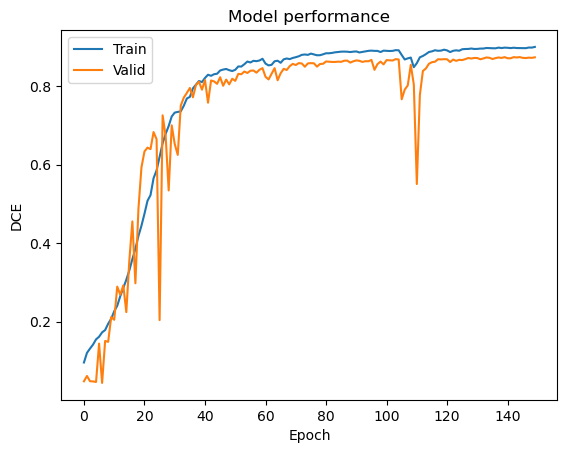

In [32]:
plt.plot(history.history['dice_coefficient'])
plt.plot(history.history['val_dice_coefficient'])
plt.title('Model performance')
plt.ylabel('DCE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

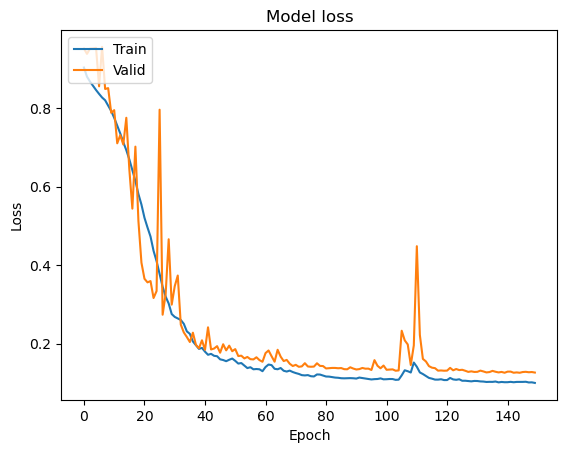

In [33]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Valid'], loc='upper left') 
plt.show()

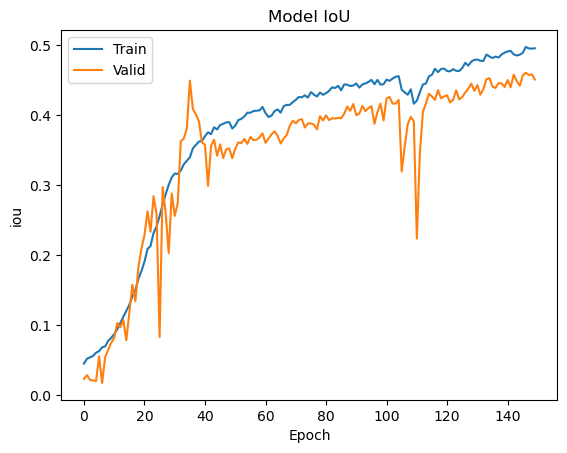

In [34]:
plt.plot(history.history['iou_coef']) 
plt.plot(history.history['val_iou_coef']) 
plt.title('Model IoU') 
plt.ylabel('iou') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Valid'], loc='upper left') 
plt.show()

In [35]:
pred=model.predict(X_test)
print(pred.shape)

3/3 [==============================] - 2s 561ms/step
(70, 32, 64, 64, 3)


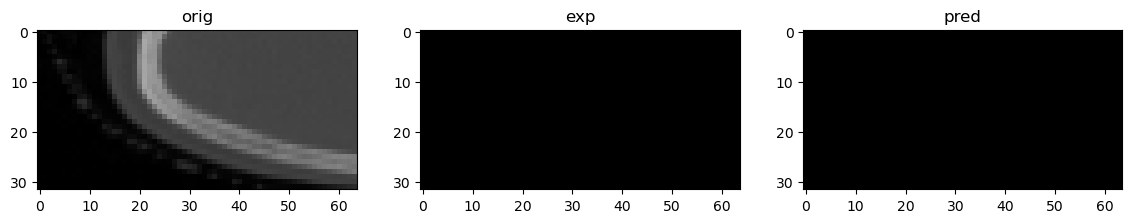

In [36]:
plt.figure(figsize=(14,6))

plt.subplot(131)
plt.title('orig')
plt.imshow(X_test[2][:,50,:],cmap='gray')


plt.subplot(132)
plt.title('exp')
plt.imshow(y_test[2][:,50,:],cmap='gray')

plt.subplot(133)
plt.title('pred')
plt.imshow(pred[2][:,50,:],cmap='gray')

In [37]:
threshold = 0.5
predicted_masks_binary = (pred > threshold).astype(np.uint8)

# Flatten the predicted masks and ground truth masks
num_samples, height, width, depth = predicted_masks_binary.shape[:4]
predicted_masks_flat = predicted_masks_binary.reshape(num_samples, -1)
ground_truth_masks_flat = y_test.reshape(num_samples, -1)

# Compute the confusion matrix
cm = confusion_matrix(ground_truth_masks_flat.flatten(), predicted_masks_flat.flatten())

# Calculate TP, FP, and FN from the confusion matrix
TP = cm[1, 1]  # True positives
FP = cm[0, 1]  # False positives
FN = cm[1, 0]  # False negatives
TN = cm[0, 0]  # True negatives

accuracy = (TP + TN) / (TP + FN + FP + TN)
specificity = TN / (TN + FP)
precision = TP / (TP + FP)
recall = TP / (TP + FN)


print("Accuracy:", accuracy)
print("Specificity:", specificity)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9900776091076079
Specificity: 0.9950195972497133
Precision: 0.8442940288147676
Recall: 0.8369217430315118


In [38]:
# print(confusion_matrix(y_test, pred))

In [39]:
res=model.evaluate(X_test,y_test,batch_size=8)
res

9/9 [==============================] - 1s 82ms/step - loss: 0.1558 - dice_coefficient: 0.8454 - iou_coef: 0.5088


[0.15576820075511932, 0.845408022403717, 0.5087544918060303]

In [40]:
model.save('/kaggle/working/unet_model_24_05.h5')